In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\FAIZAN AKHTAR\anaconda3\envs\pthon_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [3]:
df=my_dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [5]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_explode=df.explode('job_skills')

In [10]:
df_DA_US=df_explode[(df_explode['job_title_short']=='Data Analyst') & (df['job_country']=='United States')]

## JOB_LOCATION

In [17]:
df_plot=df_DA_US['job_location'].value_counts().head(10).to_frame()

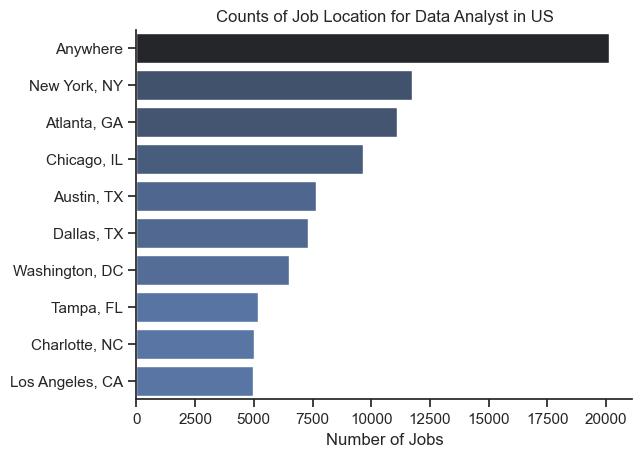

In [23]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Counts of Job Location for Data Analyst in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## JOB_OPPORTUNITIES

In [28]:
dict_coloumn_title={
    'job_work_from_home':'Work_from_home_mentioned',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}

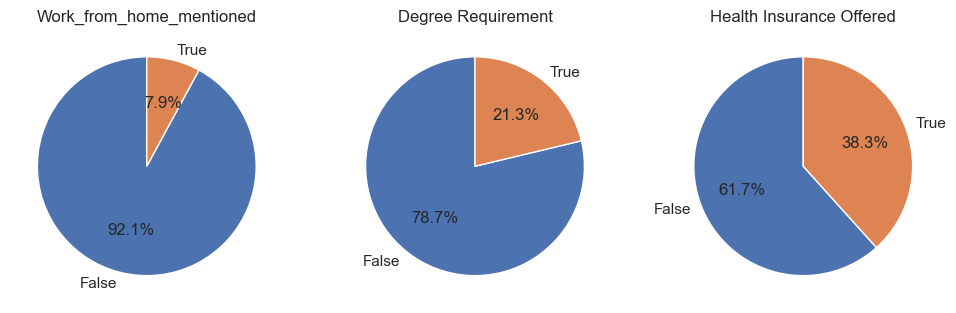

In [29]:
fig, ax=plt.subplots(1,3)
fig.set_size_inches(12,5)
for i, (coloumn, title) in enumerate(dict_coloumn_title.items()):
    ax[i].pie(df_DA_US[coloumn].value_counts(), labels=[False, True], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

## COMPANIES TO EXPLORE

In [35]:
df_plot_company_name=df_DA_US['company_name'].value_counts().head(10)

In [40]:
df_plot_company_name=df_plot_company_name.to_frame()

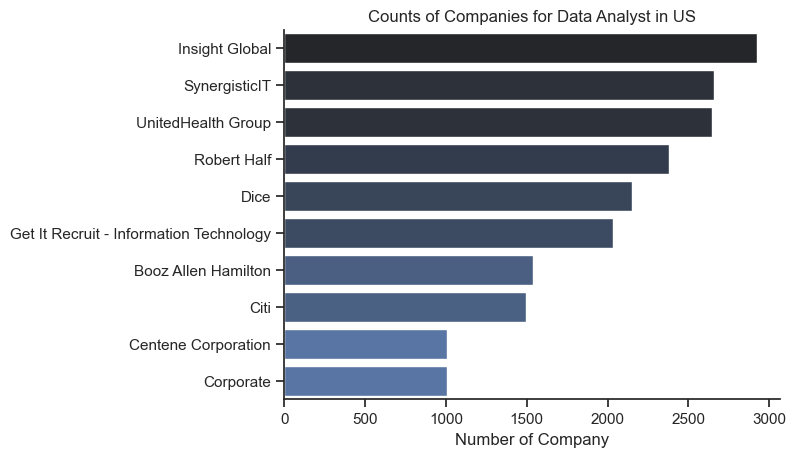

In [41]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot_company_name, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Counts of Companies for Data Analyst in US')
plt.xlabel('Number of Company')
plt.ylabel('')
plt.show()